In [2]:
import pandas as pd
import numpy as np
from matplotlib import dates

In [3]:
df = pd.read_csv("starbucks.csv",index_col="Date",parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


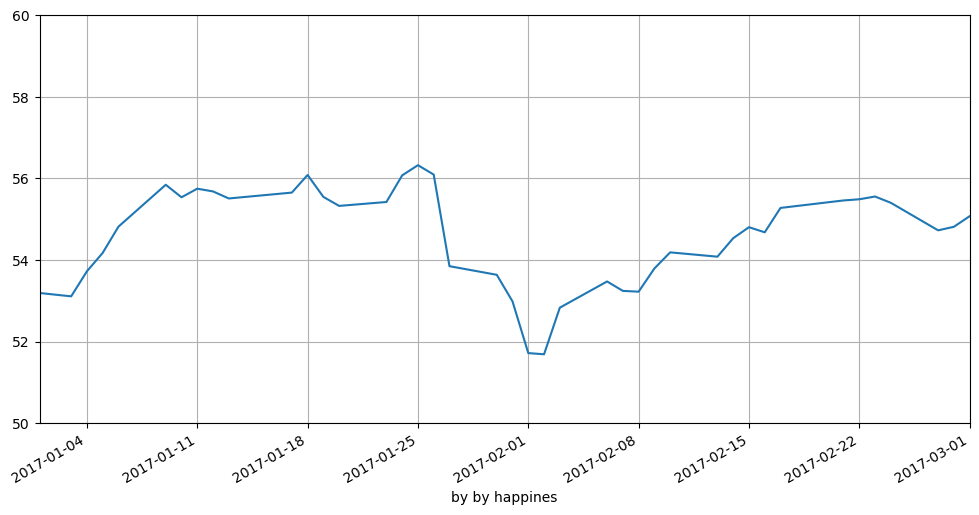

In [6]:
ax = df["Close"].plot(xlim=["2017-01-01","2017-03-01"],ylim=[50,60], figsize=(12,6))
ax.set(xlabel="by by happines")
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=2))
ax.xaxis.grid(True)
ax.yaxis.grid(True);

In [8]:
df2 = pd.read_csv("monthly_milk_production.csv",index_col="Date",parse_dates=True)
df2

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [9]:
df2.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Date', length=168, freq=None)

In [10]:
df2.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=168)

In [11]:
df2["month"] = df2.index.month
df2

,Production,month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5
...,...,...
1975-08-01,858,8
1975-09-01,817,9
1975-10-01,827,10


In [12]:
df2["month_"]=df2.index.strftime("%B")
df2

,Production,month,month_
Date,,,
1962-01-01,589,1,January
1962-02-01,561,2,February
1962-03-01,640,3,March
1962-04-01,656,4,April
1962-05-01,727,5,May
...,...,...,...
1975-08-01,858,8,August
1975-09-01,817,9,September
1975-10-01,827,10,October


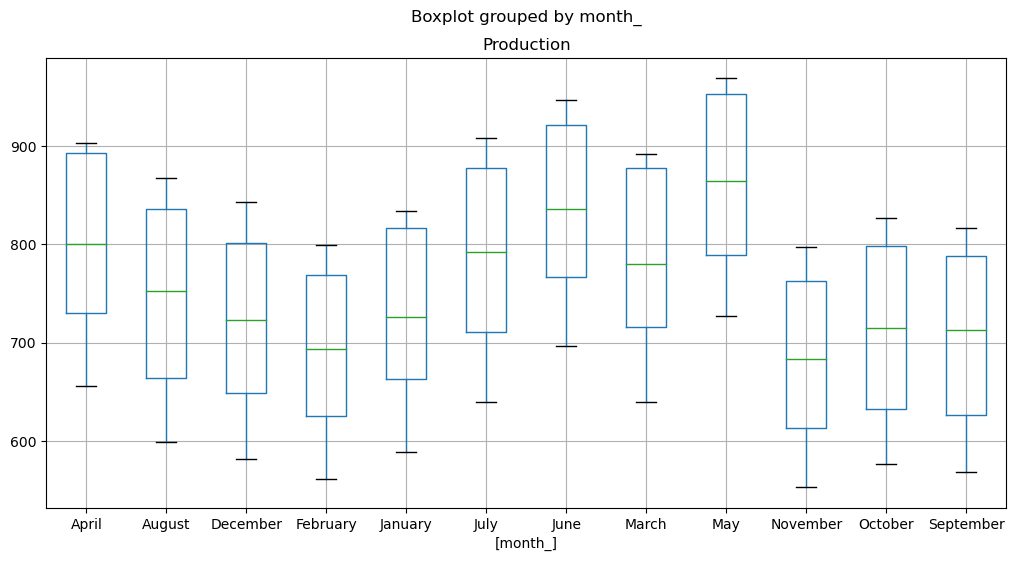

In [15]:
df2.drop("month",axis=1).boxplot(by="month_",figsize=(12,6));

In [18]:
df3 = pd.read_csv("UMTMVS.csv",index_col="DATE",parse_dates=True)
df3

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0
...,...
2018-09-01,516992.0
2018-10-01,527031.0
2018-11-01,495901.0


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UMTMVS  325 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [20]:
df3.loc["2019-01-01"]-df3.loc["2009-01-01"]

UMTMVS    129690.0
dtype: float64

In [23]:
129690.0/df3.loc["2009-01-01"]

UMTMVS    0.384721
Name: 2009-01-01 00:00:00, dtype: float64

In [26]:
df3.sort_values(by="UMTMVS",ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


<AxesSubplot:xlabel='DATE'>

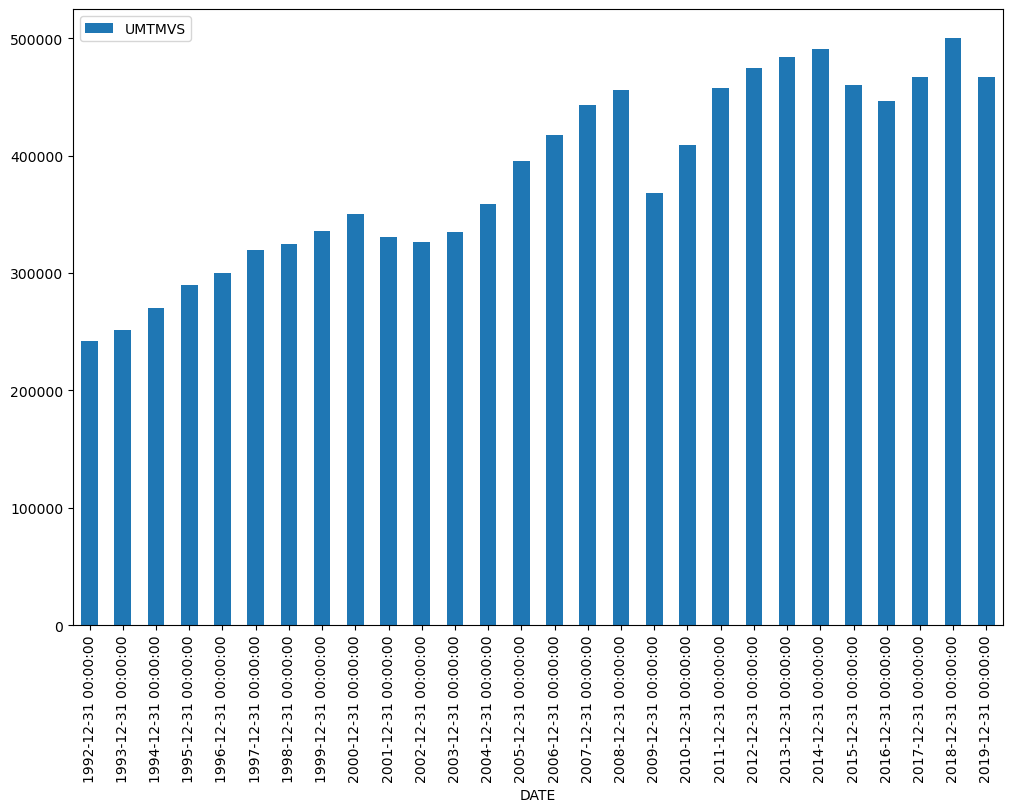

In [28]:
df3.resample("Y").mean().plot.bar(figsize=(12,8))

In [29]:
yearly_data = df3.resample("Y").mean()

In [30]:
yearly_shift = yearly_data.shift(1)

In [31]:
yearly_data

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667
1997-12-31,319558.250000
1998-12-31,324984.416667
1999-12-31,335990.583333
2000-12-31,350715.333333


In [32]:
yearly_shift

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333
1995-12-31,269842.666667
1996-12-31,289973.083333
1997-12-31,299765.666667
1998-12-31,319558.250000
1999-12-31,324984.416667
2000-12-31,335990.583333


In [34]:
yearly_shift-yearly_data

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,-9706.083333
1994-12-31,-18134.583333
1995-12-31,-20130.416667
1996-12-31,-9792.583333
1997-12-31,-19792.583333
1998-12-31,-5426.166667
1999-12-31,-11006.166667
2000-12-31,-14724.750000


In [37]:
to_find = yearly_data-yearly_shift
#the answer is this dataframe

In [39]:
to_find.idxmax()

UMTMVS   2011-12-31
dtype: datetime64[ns]

In [40]:
df3["yearly_mean"] = df3["UMTMVS"].rolling(window=12).mean()

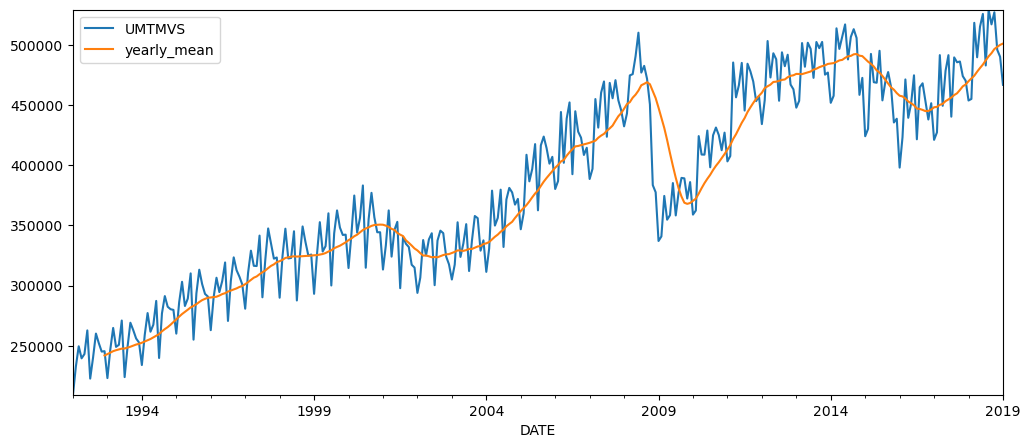

In [42]:
df3[["UMTMVS","yearly_mean"]].plot(figsize=(12,5)).autoscale(axis="both", tight=True);

In [51]:
to_find

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333
1997-12-31,19792.583333
1998-12-31,5426.166667
1999-12-31,11006.166667
2000-12-31,14724.750000


In [56]:
to_find.max()

UMTMVS    48384.75
dtype: float64

In [47]:
to_find.idxmax()

UMTMVS   2011-12-31
dtype: datetime64[ns]

In [53]:
to_find.max()["UMTMVS"]

48384.75

In [60]:
to_find["UMTMVS"].max()

48384.75